In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.20/04


In [2]:
##### setting file path #####

sig_rootpath = "/data/Chen-Wang/gghhtest/Events/run_01_decayed_1/tag_1_delphes_events.root"
sig_file = uproot.open(sig_rootpath)

In [17]:
sig_Fjet_Eta = sig_file["Delphes;1"]["FatJet.Eta"].array()
sig_Fjet_Phi = sig_file["Delphes;1"]["FatJet.Phi"].array()
sig_Fjet_Particles = sig_file["Delphes;1"]["FatJet.Particles"].array()

print(sig_Fjet_Eta[3423])
print(sig_Fjet_Phi[3423])

print(sig_Fjet_Particles[3423])

[]
[]
[]


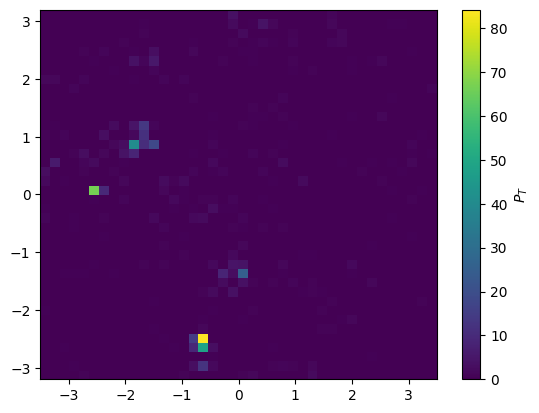

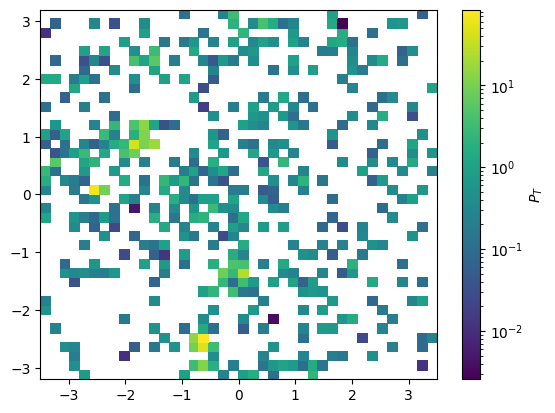

In [18]:
##### set signal event content #####

event_num = 3423
grid_num = 40    # means n^2 points
events = [sig_file["Delphes;1"]["Particle.Status"].array()[event_num],
        sig_file["Delphes;1"]["Particle.PT"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Eta"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Phi"].array()[event_num],
        sig_file["Delphes;1"]["Particle.Mass"].array()[event_num]
        ]

where_finalstate = np.where(events[0]==1)
final_Eta = events[2][where_finalstate]
final_Phi = events[3][where_finalstate]
final_PT = events[1][where_finalstate]

"""
final_Eta = np.append(final_Eta, 3)
final_Phi = np.append(final_Phi, -2)
final_PT = np.append(final_PT, 3000)
"""

##### Draw the final state PT figure #####

xedges = np.linspace(-3.5, 3.5, grid_num+1)        # Eta limit
yedges = np.linspace(-3.2, 3.2, grid_num+1)    # Phi limit
PT = np.zeros([grid_num,grid_num])

for Eta in range(grid_num):
    for Phi in range(grid_num):
        where1 = np.where((xedges[Eta]<final_Eta) & (final_Eta<xedges[Eta+1]) & (yedges[Phi]<final_Phi) & (final_Phi<yedges[Phi+1]))
        PT[Eta][Phi] = sum(final_PT[where1])

pcm = plt.pcolormesh(xedges, yedges, PT.T)
plt.colorbar(pcm, label='$P_T$')
plt.show()      

pcm = plt.pcolormesh(xedges, yedges, PT.T, norm=LogNorm())
plt.colorbar(pcm, label='$P_T$')
plt.show()

In [5]:
##### set signal event content #####

events = [sig_file["Delphes;1"]["Particle.Status"].array(),
        sig_file["Delphes;1"]["Particle.M1"].array(),
        sig_file["Delphes;1"]["Particle.M2"].array(),
        sig_file["Delphes;1"]["Particle.D1"].array(),
        sig_file["Delphes;1"]["Particle.D2"].array(),
        sig_file["Delphes;1"]["Particle.PID"].array(),
        sig_file["Delphes;1"]["Particle.PT"].array(),
        sig_file["Delphes;1"]["Particle.Eta"].array(),
        sig_file["Delphes;1"]["Particle.Phi"].array(),
        sig_file["Delphes;1"]["Particle.Mass"].array()
        ]

##### reshape the signal data #####

events = np.expand_dims(events, axis=-1)
events = events.transpose((1,0,2))
events = np.squeeze(events,axis=(2,))

##### set features #####

_Status, _M1, _M2, _D1, _D2, _PID, _PT, _Eta, _Phi, _Mass = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 
Labels = ["Status", "M1", "M2", "D1", "D2", "PID", "PT", "Eta", "Phi", "Mass"]

##### Show truth record #####

print("Index", "\t","Status", "\t","M1"
    "\t","M2" ,"\t","D1", "\t","D2", "\t","PID", 
    "\t\t","PT" "\t","Eta", "\t\t","Phi", 
    "\t\t","Mass")

event_num = 5
for j in range(len(events[event_num][0])):
    print(j, "\t", events[event_num][_Status][j],"\t\t",
    events[event_num][_M1][j], "\t", events[event_num][_M2][j],
    "\t", events[event_num][_D1][j], "\t", events[event_num][_D2][j],
    "\t", str(events[event_num][_PID][j]).ljust(12, ' '), "\t", round(events[event_num][_PT][j],1),  "\t",
        str(round(events[event_num][_Eta][j],2)).ljust(12, ' ') , "\t",
        str(round(events[event_num][_Phi][j],3)).ljust(12, ' '), "\t",
        round(events[event_num][_Mass][j],3))

Index 	 Status 	 M1	 M2 	 D1 	 D2 	 PID 		 PT	 Eta 		 Phi 		 Mass
0 	 21 		 5 	 -1 	 3 	 4 	 21           	 0.0 	 999.9        	 0.0          	 0.0
1 	 21 		 6 	 -1 	 3 	 4 	 21           	 0.0 	 -999.9       	 0.0          	 0.0
2 	 43 		 6 	 -1 	 15 	 15 	 21           	 243.3 	 -1.08        	 2.366        	 0.0
3 	 22 		 0 	 1 	 8 	 8 	 25           	 17.3 	 3.23         	 2.997        	 125.0
4 	 22 		 0 	 1 	 9 	 9 	 25           	 17.3 	 -3.04        	 -0.144       	 125.0
5 	 42 		 10 	 -1 	 0 	 0 	 21           	 0.0 	 999.9        	 2.356        	 0.0
6 	 41 		 12 	 -1 	 1 	 2 	 21           	 0.0 	 -999.9       	 -1.166       	 0.0
7 	 43 		 12 	 -1 	 16 	 17 	 -2           	 240.8 	 -2.46        	 -2.896       	 0.33
8 	 44 		 3 	 -1 	 13 	 13 	 25           	 11.4 	 3.13         	 -1.892       	 125.0
9 	 44 		 4 	 -1 	 14 	 14 	 25           	 238.6 	 -0.89        	 -0.732       	 125.0
10 	 42 		 19 	 -1 	 5 	 5 	 21           	 0.0 	 999.9        	 0.278        	 0.0
11 

In [6]:
sig_file["Delphes;1"].show()

Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.ReadTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcTime             TStreamerBasicType         asjagged(asdtype('>f4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.MPI                  TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSection         TStreamerBasicType         asjagged(asdtype('>f4'))
Event.CrossSectionError    TStreamerBasicType         asjagged(asdtype('>f4'))
Event.Scale                TStreamerBasicType         asjagged(asdtype('>f4'))
Event.AlphaQED             TStreamerBasicType         asjagged